In [246]:
import csv
import numpy as np

train_data = np.ones((300, 4))
train_y = np.zeros((300, 1))
test_data = np.ones((300, 4))
test_y = np.zeros((300, 1))

train_x_data = []
train_y_data = []
train_z_data = []
train_h_data = []

test_x_data = []
test_y_data = []
test_z_data = []
test_h_data = []


with open('data_train.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    for i in reader:
        train_x_data.append(i[0])
        train_y_data.append(i[1])
        train_z_data.append(i[2])
        train_h_data.append(i[3])

with open('data_test.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    for i in reader:
        test_x_data.append(i[0])
        test_y_data.append(i[1])
        test_z_data.append(i[2])
        test_h_data.append(i[3])

train_x_data = np.array(train_x_data).astype(np.float)
train_y_data = np.array(train_y_data).astype(np.float)
train_z_data = np.array(train_z_data).astype(np.float)
train_h_data = np.array(train_h_data).astype(np.float)

test_x_data = np.array(test_x_data).astype(np.float)
test_y_data = np.array(test_y_data).astype(np.float)
test_z_data = np.array(test_z_data).astype(np.float)
test_h_data = np.array(test_h_data).astype(np.float)

In [250]:
epochs = 5000
lr = 0.00001

seta_0 = -1
seta_1 = 0
seta_2 = 1
seta_3 = 2

prev = 0

train_err_list = []
test_err_list = []


seta_0_list = [seta_0]
seta_1_list = [seta_1]
seta_2_list = [seta_2]
seta_3_list = [seta_3]

M = len(train_x_data)

for i in range(epochs):
    err0 = 0
    err1 = 0
    err2 = 0
    err3 = 0
    err_t = 0
    
    for x_i, y_i, z_i, h_i in zip(train_x_data, train_y_data, train_z_data, train_h_data):
        
        y_hat = z_i*seta_3 + y_i * seta_2 + x_i * seta_1 + seta_0
        #print(f"{x_i} , {y_i} , {z_i} , {h_i}, {y_hat} = {h_i - y_hat}")
        err = h_i - y_hat
        err0 += err
        err1 += err * x_i
        err2 += err * y_i
        err3 += err * z_i
    
    for x_i, y_i, z_i, h_i in zip(test_x_data, test_y_data, test_z_data, test_h_data):
        y_hat = z_i*seta_3 + y_i * seta_2 + x_i * seta_1 + seta_0
        err_t += h_i - y_hat
    #print(err0/M)
    #print(f"{seta_0} , {seta_1} , {seta_2} , {seta_3}")
    seta_3 = seta_3 + lr * err3 / M
    seta_2 = seta_2 + lr * err2 / M
    seta_1 = seta_1 + lr * err1 / M
    seta_0 = seta_0 + lr * err0 / M
    
    #history
    seta_0_list.append(seta_0)
    seta_1_list.append(seta_1)
    seta_2_list.append(seta_2)
    seta_3_list.append(seta_3)
    
    train_err_list.append((err0**2)/(2*M))
    test_err_list.append((err_t**2)/(2*M))
    
    
    

    
    

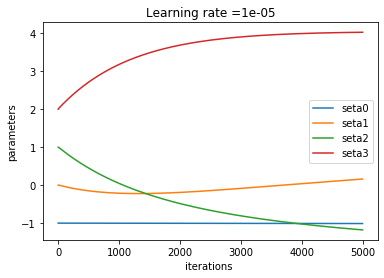

In [253]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(np.squeeze(seta_0_list), label='seta0')
plt.plot(np.squeeze(seta_1_list), label='seta1')
plt.plot(np.squeeze(seta_2_list), label='seta2')
plt.plot(np.squeeze(seta_3_list), label='seta3')
plt.ylabel('parameters')
plt.xlabel('iterations ')
plt.legend()
plt.title("Learning rate =" + str(lr))
plt.show()

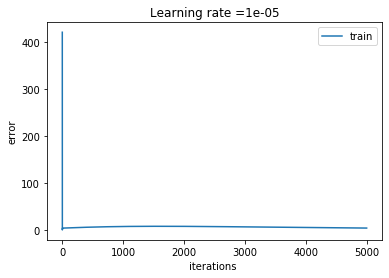

In [254]:
plt.plot(np.squeeze(train_err_list), label='train')
plt.ylabel('error')
plt.xlabel('iterations ')
plt.legend()
plt.title("Learning rate =" + str(lr))
plt.show()